<a href="https://colab.research.google.com/github/sgr1118/EX/blob/main/%5BExp_09%5D_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9-2. 셸로우 포커스 만들기 (1) 사진을 준비하자

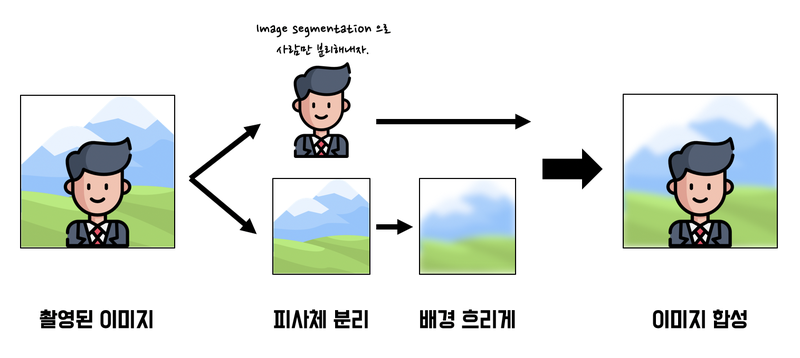

- 배경이 있는 셀카를 촬영 (배경과 사람의 거리가 약간 멀리 있으면 좋다.)

- 시맨틱 세그멘테이션으로 피사체(사람)와 배경을 분리

- 블러링 기술로 배경을 흐리게 합니다.

- 피사체를 배경의 원래 위치에 합성

# 9-3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기

## 세그멘테이션(Segmentation)

- 이미지에서 픽셀 단위로 관심 객체를 추출하는 방법

- 모든 픽셀에 라벨을 할당하고 같은 라벨은 ‘공통적인 특징'을 가진다고 가정

## 시맨틱 세그멘테이션(semantic segmentation)

- 물리적 의미 단위로 인식하는 세그맨테이션

- 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법

## 인스턴스 세그멘테이션(Instance segmentation)

- 사람 개개인별로 다른 라벨을 가지게 합니다.

- 여러 사람이 한 이미지에 등장할 때 각 객체를 분할해서 인식하자는 것이 목표

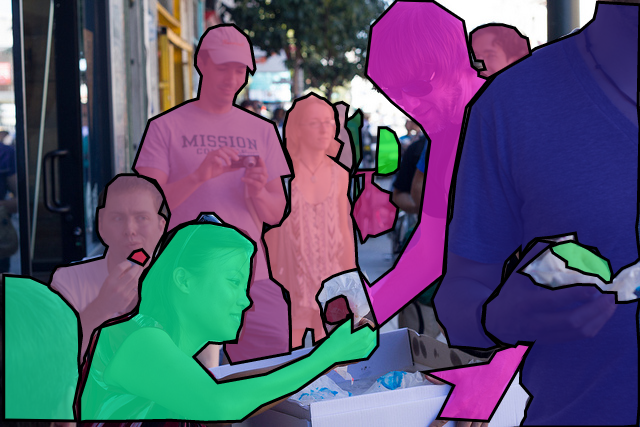




In [ ]:
# 라이브러리 설치
!pip install numpy==1.21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 4.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
!pip install tensorflow-gpu==2.4.0 keras==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 170 kB 66.8 MB/s 
     |████████████████████████████████| 462 kB 65.5 MB/s 
     |████████████████████████████████| 3.8 MB 51.4 MB/s 
     |████████████████████████████████| 14.8 MB 52.7 MB/s 
     |████████████████████████████████| 2.9 MB 34.6 MB/s 
     |████████████████████████████████| 132 kB 74.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.6 kB/s 
     |████████████████████████████████| 5.8 MB 34.6 MB/s 
     |████████████████████████████████| 511.7 MB 4.5 kB/s 
     |████████████████████████████████| 518.1 MB 18 kB/s 
     |████████████████████████████████| 587.9 MB 11 kB/s 
     |████████████████████████████████| 668.6 MB 6.8 kB/s 
     |████████████████████████████████| 668.6 MB 1.5 kB/s 
     |████████████████████████████████| 668.6 MB 2.4 kB/s 
     |███████████████████

In [ ]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
tensorflow 2.4.4 requires typing-extensions~=3.7.4, but you have typing-extensions 4.3.0 which is incompatible.
tensorflow-gpu 2.4.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.3.0 which is incompatible.
spacy 3.4.1 requires typing-extensions<4.2.0,>=3.7.4; python_ve

In [ ]:
!pip install Pillow==8.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 4.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 8.3.2 which is incompatible.


In [ ]:
import pixellib
print(pixellib.__version__)

AttributeError: ignored

In [ ]:
# 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
import tensorflow as tf
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(500, 892, 3)


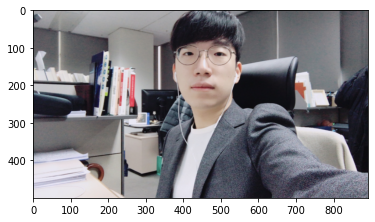

In [ ]:
# 이미지 불러오기
img_path = '/content/drive/MyDrive/Aiffel/EX/camera image/my_image.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 9-4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기

In [ ]:
model_dir = '/content/drive/MyDrive/Aiffel/EX/camera image'
model_file = model_dir+'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Aiffel/EX/camera imagedeeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f8321871450>)

In [ ]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [ ]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

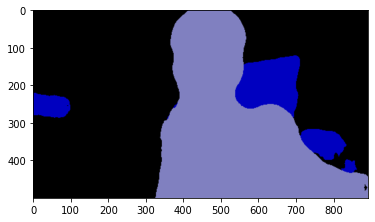

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [ ]:
# 사람만 추출해보기
plt.imshow(output)
plt.show()

segvalues

In [ ]:
# 추출한 라벨 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [ ]:
# 물체 output에 어떤 색상으로 나타낼것인가?
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
colormap[15]

array([192, 128, 128])

In [ ]:
# output 이미지 색상 순서 바꿔주기
seg_color = (128,128,192)

(500, 892)


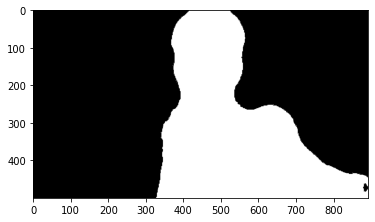

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

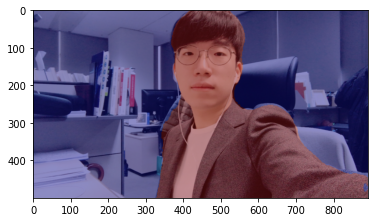

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인
import numpy as np
img_show = img_orig.copy()

# True와 False인 값을 각각 255과 0으로 바꿔주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 9-5. 셸로우 포커스 만들기 (4) 배경 흐리게 하기

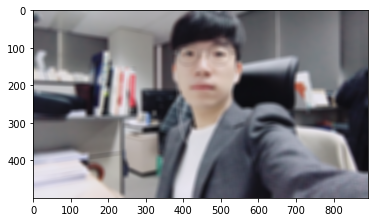

In [ ]:
# (13,13)은 blurring kernel size
# 다양하게 바꿔보기

img_orig_blur = cv2.blur(img_orig, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

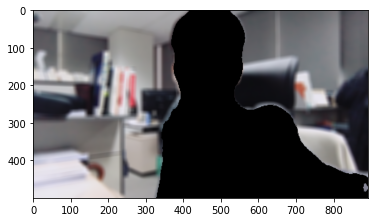

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 9-6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

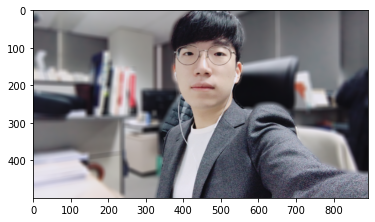

In [ ]:
# 배경 + 사람 사진 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 9-7. 프로젝트: 인물 모드 문제점 찾기

# 나의 얼굴을 활용하여 인물모드 만들기

In [ ]:
# 필요한 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
import tensorflow as tf
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1920, 1920, 3)


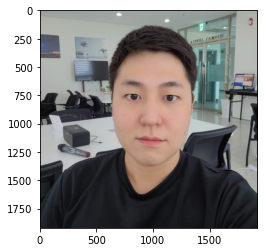

In [ ]:
# 인물모드 직접해보기

# 이미지 불러오기
img_path = '/content/drive/MyDrive/Aiffel/EX/EX9_image/my_face.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 셸로우 포커스 만들기
model_dir = '/content/drive/MyDrive/Aiffel/EX/camera image'
model_file = model_dir+'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Aiffel/EX/camera imagedeeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f831c04b350>)

In [ ]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

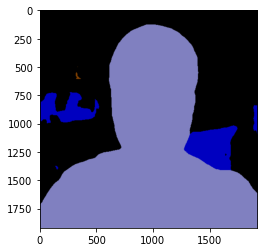

{'class_ids': array([ 0,  9, 15, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [ ]:
# 사람만 추출해보기
plt.imshow(output)
plt.show()

segvalues

In [ ]:
# 추출한 라벨 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
tv


In [ ]:
# 물체 output에 어떤 색상으로 나타낼것인가?

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
colormap[15]

array([192, 128, 128])

In [ ]:
# output 이미지 색상 순서 바꿔주기
seg_color = (128,128,192)

(1920, 1920)


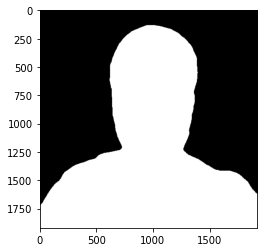

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

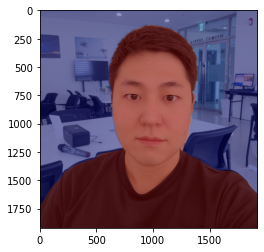

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인
import numpy as np
img_show = img_orig.copy()

# True와 False인 값을 각각 255과 0으로 바꿔주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

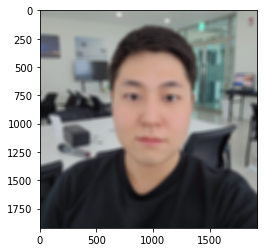

In [ ]:
# (13,13)은 blurring kernel size
# 다양하게 바꿔보기

img_orig_blur = cv2.blur(img_orig, (40,40))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

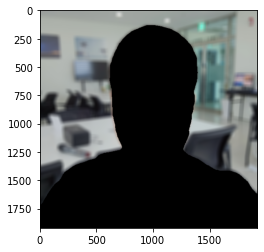

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 9-6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

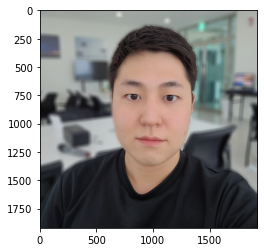

In [ ]:
# 배경 + 사람 사진 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 정면구도에서는 주변 블러처리가 꽤 잘 이루어졌다.

# 고양이 사진을 활용하여 인물모드 만들기

In [ ]:
# 필요한 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
import tensorflow as tf
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(338, 530, 3)


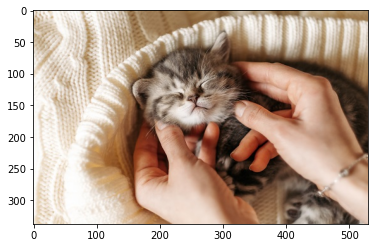

In [ ]:
# 인물모드 직접해보기

# 이미지 불러오기
img_path = '/content/drive/MyDrive/Aiffel/EX/EX9_image/cat.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 셸로우 포커스 만들기
model_dir = '/content/drive/MyDrive/Aiffel/EX/camera image'
model_file = model_dir+'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# PixelLib가 제공하는 모델의 url입니다
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
#urllib.request.urlretrieve(model_url, model_file)

In [ ]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [ ]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 고양이의 라벨은 8이다.
# 고양이의 영역만 추출해야한다.

21

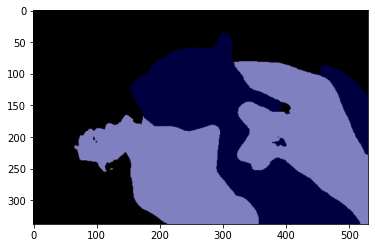

{'class_ids': array([ 0,  8, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [ ]:
# 고양이 + 사람 추출해보기
plt.imshow(output)
plt.show()

segvalues

In [ ]:
# 추출한 라벨 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
person


In [ ]:
# 물체 output에 어떤 색상으로 나타낼것인가?

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
print(colormap[8])
# B:64, G:0, R:0 > R:0, G:0, B:64


[64  0  0]


In [ ]:
# output 이미지 색상 순서 바꿔주기
# output 이미지는 BGR 순서로 색상이 출력되기때문에 RGB로 바꿔줘야한다.
seg_color = (0,0,64)

(338, 530)


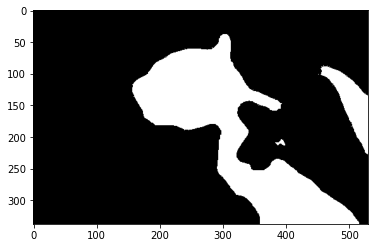

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다.
# 고양이 형태 출력
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

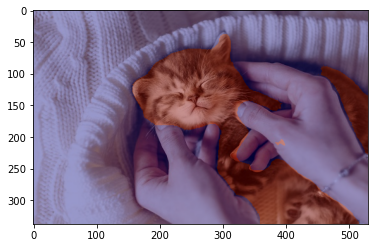

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인 - 고양이
import numpy as np
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

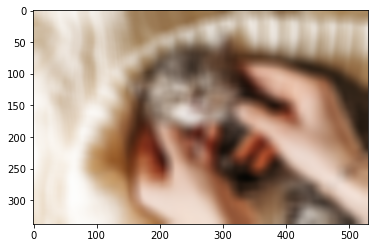

In [ ]:
# (13,13)은 blurring kernel size
# 다양하게 바꿔보기

img_orig_blur = cv2.blur(img_orig, (20,20))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

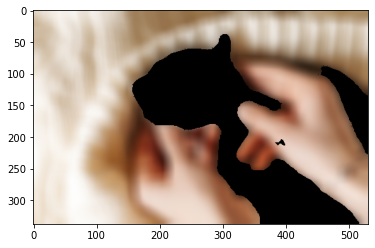

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

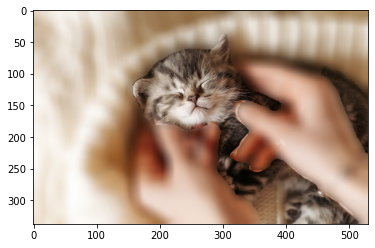

In [ ]:
# 배경 + 고양이 사진 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 사람 손이 고양이를 감싸고있다보니 매우 어색한 사진이 출력됨
# 이 문제를 해결하기 위해서 고양이와 사람의 seg_color를 np.all을 사용하여 동시에 출력해야한다.

# 실패 사례

- 고양이와 사람의 seg_color를 각각 추출하여 마지막에 concat을하면 합쳐지지 않을까? 생각했으나 합칠수 없었다.

- (1) 블러 배경 + 고양이 세그멘테이션을 수행하고 그 사진에 
- (2)사람 세그멘테이션을 합치려했으나 
- (1)까지만 코드가 작동하였고 (2)은 작동하지 않았다.

- 그러므로 고양이와 사람의 seg_amp을 동시에 출력하는 방법을 선택하였다.

(338, 530)


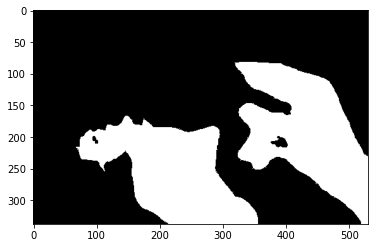

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다.
# 손 형태 출력
seg_map_m = np.all(output==seg_color_man, axis=-1)
print(seg_map_m.shape)
plt.imshow(seg_map_m, cmap='gray')
plt.show()

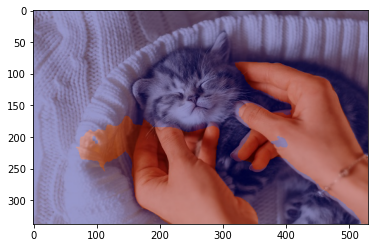

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인 - 사람
import numpy as np
img_show = img_orig.copy()

# True와 False인 값을 각각 255과 0으로 바꿔주기
img_mask_m = seg_map_m.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다.
color_mask_m = cv2.applyColorMap(img_mask_m, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다
img_show_m = cv2.addWeighted(img_show, 0.6, color_mask_m, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_m, cv2.COLOR_BGR2RGB))
plt.show()

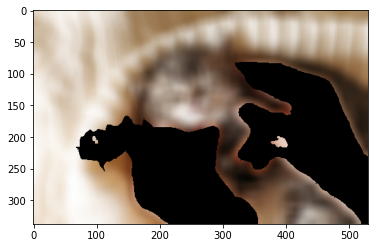

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출 - 사람
img_mask_color_m = cv2.cvtColor(img_mask_m, cv2.COLOR_GRAY2BGR)
img_bg_mask_m = cv2.bitwise_not(img_mask_color_m) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur_m = cv2.bitwise_and(img_orig_blur, img_bg_mask_m)
plt.imshow(cv2.cvtColor(img_bg_blur_m, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이와 사람 동시 출력해보기

- 이미지 출력 과정을 제외하고 seg_color부분부터 시작

- OR조건을 활용하여 seg_map 동시 출력

- 세그멘테이션 추출 확인 후 블러 처리한 배경화 concat하여 이미지 추출

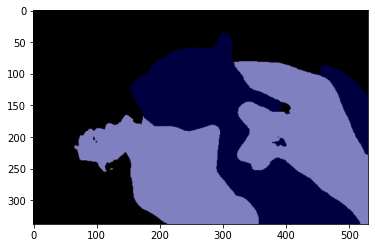

{'class_ids': array([ 0,  8, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [ ]:
# 고양이 + 사람 추출해보기
plt.imshow(output)
plt.show()

segvalues

In [ ]:
# 추출한 라벨 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

# 고양이 : 8, 사람 : 15

background
cat
person


In [ ]:
# output 이미지 색상 순서 바꿔주기
# output 이미지는 BGR 순서로 색상이 출력되기때문에 RGB로 바꿔줘야한다.
seg_color_cat = (0,0,64)
seg_color_man = (128,128,192)

In [ ]:
# 고양이, 사람의 BGR 색상 출력
print(colormap[8], colormap[15])
# B:64, G:0, R:0 > R:0, G:0, B:64
# B:192, G:128, R:128 > R:128, G:128, B:192

[64  0  0] [192 128 128]


(338, 530)


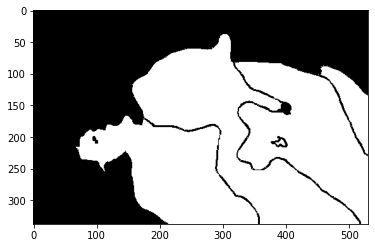

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다.
# or조건을 활용하여 고양이와 사람의 seg_map 동시 출력
seg_map = np.all((output== seg_color_cat) | (output== seg_color_man), axis=-1)

print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

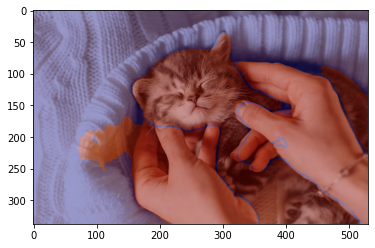

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인
import numpy as np
img_show = img_orig.copy()

# True와 False인 값을 각각 255과 0으로 바꿔주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

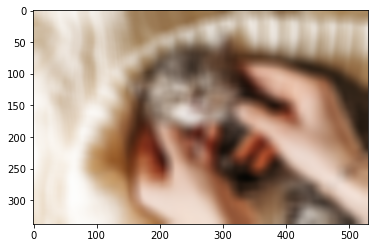

In [ ]:
# (13,13)은 blurring kernel size
# 다양하게 바꿔보기

img_orig_blur = cv2.blur(img_orig, (20,20))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

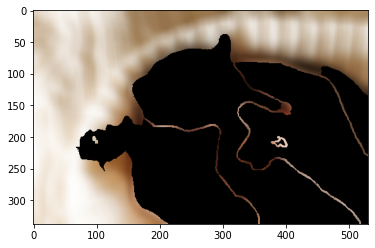

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

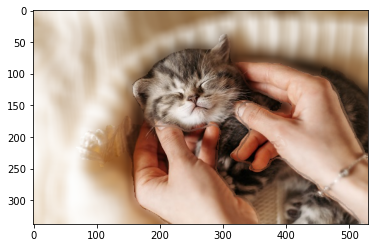

In [ ]:
# 배경 + (고양이 + 사람) 사진 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 인물 사진이 정상적으로 출력되었다.
# 고양이의 세그멘테이션만 활용한 경우보다 더욱 그럴듯한 인물사진이 완성되었다.
# 다만 손이 고양이보다는 약간 흐릿하게 보이는 문제가 있다.

# 배경 전환 크로마키 제작

In [ ]:
# 필요한 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
import tensorflow as tf
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import glob
from PIL import Image

(1920, 1920, 3)


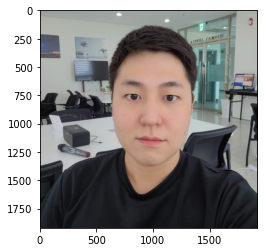

In [ ]:
# 인물과 배경 이미지 불러오기

# 인물
# 이미지 불러오기
img_path_man = '/content/drive/MyDrive/Aiffel/EX/EX9_image/my_face.jpg'
img_orig = cv2.imread(img_path_man)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

1  images to be resized.
(1920, 1920, 3)


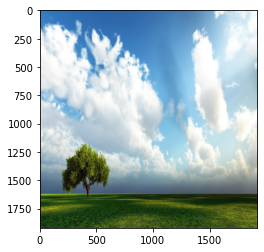

In [ ]:
# 배경
img_path_back = '/content/drive/MyDrive/Aiffel/EX/EX9_image/backgruond.jpg'
img_backgruond = cv2.imread(img_path_back)

# 1. 데이터 불러오기 + Resize

def resize_images(img_path):
	images=glob.glob(img_path)  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 1920x1920 사이즈로 바꾸어 저장합니다.
	target_size=(1920,1920)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
  
resize_images(img_path_back)

img_backgruond = cv2.imread(img_path_back)

print(img_backgruond.shape)
plt.imshow(cv2.cvtColor(img_backgruond, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 조정 완료

In [ ]:
# 셸로우 포커스 만들기
model_dir = '/content/drive/MyDrive/Aiffel/EX/camera image'
model_file = model_dir+'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# PixelLib가 제공하는 모델의 url입니다
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 이미 앞에서 다운을 했으니 생략
#urllib.request.urlretrieve(model_url, model_file)

In [ ]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path_man)

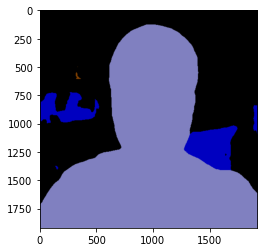

{'class_ids': array([ 0,  9, 15, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [ ]:
# 사람만 추출해보기
plt.imshow(output)
plt.show()

segvalues

In [ ]:
# 추출한 라벨 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
tv


In [ ]:
# 물체 output에 어떤 색상으로 나타낼것인가?

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
colormap[15]

array([192, 128, 128])

In [ ]:
# output 이미지 색상 순서 바꿔주기
seg_color = (128,128,192)

(1920, 1920)


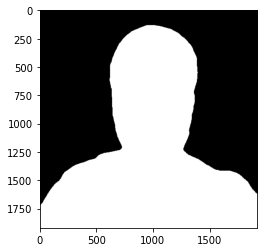

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

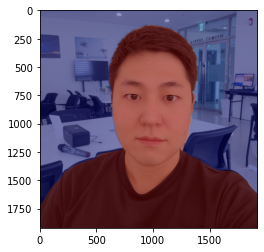

In [ ]:
# 원래 이미지와 비교하여 세그멘테이션 확인
import numpy as np
img_show = img_orig.copy()

# True와 False인 값을 각각 255과 0으로 바꿔주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

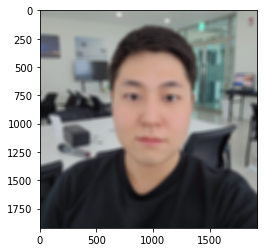

In [ ]:
# (13,13)은 blurring kernel size
# 다양하게 바꿔보기

img_orig_blur = cv2.blur(img_orig, (40,40))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

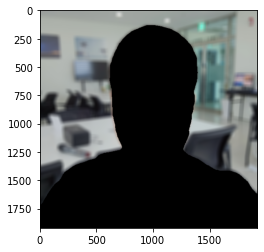

In [ ]:
# 블러 처리한 이미지에서 세그멘테이션 마스크를 이용하여 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # bitwise_not : 이미지 반전 / 배경은 255, 사람은 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

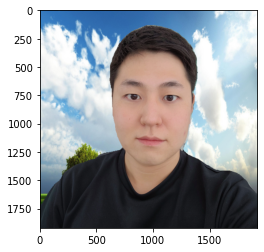

In [ ]:
# 배경 + 사람 사진 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_backgruond)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 조금 어색하지만 배경에 나의 사진이 잘 합성되었다.

# 인물 모드 사진의 문제점은 어떻게 해결할 수 있을까

### 전체적인 문제점

- 저는 인물사진에서는 정면을 바라보고있고 물체와 구분이 확실한 사진을 쓰다보니 인물모드에서는 큰 문제를 느끼지 못했습니다. 다만 다른 사례를 찾아보니 전신이나오거나 거리가 약간 멀어질수록 인물사진 모드가 잘 적용되지 못하는 사례를 보았습니다.

- 그리고 제가 사용한 고양이 사진 같은 경우 한번에 두 가지 형태를 불러오려하면 형태가 약간 일그러지는 현상을 볼 수 있습니다.

### 왜 이런 문제가 발생했는가?

- 모델이 이미지를 받아들일때 2D방식으로 받아들이면서 Depth문제가 생긴것으로 생각됩니다.

### 해결방안은?

- 이미지를 3D로 인식하여 깊이를 감지하여야 한다고 생각합니다.
- 하드웨어적으로 3D 카메라를 사용하는 방법이 있습니다.
- 소프트웨어적으로는 google의 struct2Depth를 사용하여 이미지의 depth를 학습시켜 해결할 수 있다.


# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 여러가지 세그멘테이션 추출을 하는 방법을 이해하기 전까지 어려웠습니다. 어려웠던 이유는 기본적인 파이썬 문법이 약했기 때문입니다.

 (2) 라이브러리 버젼 충돌때문에 발생하는 오류 수정이 힘들었습니다. 다행히 퍼실리테이션님들의 도움으로 해결했지만 나중에는 버젼마다 어떤 오류가 생기는지 스스로 찾아봐야할 거 같습니다.
 

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) 여러가지 세그멘테이션을 추출할 수 있다. 

- 인물사진은 단일 세그멘테이션만 추출하면 상관없었습니다. 다만 인물이 동물이 안고있거나 어떤 물제를 함께 들고있는 경우에는 함께 세그멘테이션을 출력해야 했습니다.

- 그래서 저는 seg_map출력에서 OR조건을 활용하여 고양이와 사람을 동시에 출력하였습니다.




참조

(1) [numpy OR조건 이해](https://nevertrustbrutus.tistory.com/409)


